In [1]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df1 = pd.read_csv('sample.csv', parse_dates=['Time'])
df1.head(70)

,Time,ProxyName,TxnID,GTid,1,2,3,4,5,6,...,8,9,10,11,12,13,14,15,16,uri
0,2018-05-30 00:03:00,TaxBreakoutServiceV001,4216842335,4216842335,0,1,0,0,1,0,...,49,50,49,50,50,0,50,0,1,/taxbreakout
1,2018-05-30 00:08:00,TaxBreakoutServiceV001,1722928301,1722928301,0,1,0,1,1,0,...,69,69,69,69,69,0,69,1,1,/taxbreakout
2,2018-05-30 00:09:00,TaxBreakoutServiceV001,4218576767,4218576767,0,1,0,0,1,0,...,45,45,45,45,45,0,45,0,1,/taxbreakout
3,2018-05-30 00:09:00,TaxBreakoutServiceV001,4218704991,4218704991,0,0,0,0,1,0,...,67,67,67,67,67,0,67,0,0,/taxbreakout
4,2018-05-30 00:11:00,TaxBreakoutServiceV001,1811923351,1811923351,0,1,0,1,1,0,...,51,52,51,52,52,0,51,1,1,/taxbreakout
5,2018-05-30 00:12:00,TaxBreakoutServiceV001,1812142823,1812142823,0,1,0,0,1,0,...,46,46,46,46,47,0,46,0,1,/taxbreakout
6,2018-05-30 00:14:00,TaxBreakoutServiceV001,4220143263,4220143263,0,1,0,1,1,0,...,54,54,54,54,54,0,54,1,1,/taxbreakout
7,2018-05-30 00:22:00,TaxBreakoutServiceV001,4222385327,4222385327,0,1,0,1,1,0,...,111,112,111,112,112,0,112,1,1,/taxbreakout
8,2018-05-30 00:23:00,TaxBreakoutServiceV001,4222505615,4222505615,0,1,0,1,1,0,...,41,41,41,41,41,0,41,1,1,/taxbreakout
9,2018-05-30 00:23:00,TaxBreakoutServiceV001,4222505647,4222505647,0,1,0,1,1,1,...,69,69,69,69,69,0,69,1,1,/taxbreakout


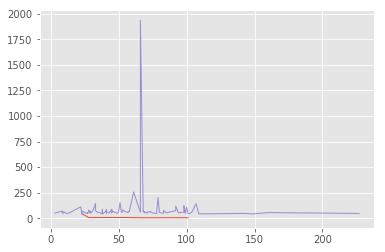

In [2]:
df1['FSTrsfm'] = df1['3'] + df1['4'] + df1['6'] + df1['7']

df1['BSTrsmn'] = df1['2'] + df1['5'] + df1['15'] + df1['16']

df1['BRTime'] = df1['8']

df1['BSTrsfm'] = df1['10'] + df1['11'] + df1['13'] + df1['14']

df1['FSTrsmn'] = df1['9'] + df1['12']

df1['hour']=df1.Time.dt.hour

df1['minute']=df1.Time.dt.minute

df1['day']=df1.Time.dt.day

df1['time']= df1['hour'] * 60 + df1['minute']

df2 = df1.loc[:,['Time','hour','time','BRTime','TxnID','uri']]
##display(df2)
##df2.groupby(['hour','uri']).unstack().plot()


##fig, ax = plt.subplots(figsize=(8,6))
grp=df2.groupby('uri')
mat=[]
for name,data in grp:
    mat.append(name)

##dfe=df2['uri'=='/taxbreakout']

xval=[]
yval=[]
for elem in mat:
    dfe=df2.loc[df2['uri'] == elem]
    ##print dfe['BRTime'].tolist()
    xval.append(dfe['time'].tolist())
    yval.append(dfe['BRTime'].tolist())

##print xval[1]
##print yval[1]

from matplotlib import pyplot as plt
from matplotlib import style

style.use('ggplot')

for i in range(len(xval)):
    plt.plot(xval[i],yval[i],label='service1',linewidth=1)
    
plt.show()
     

In [3]:
jsonify(df2['BRTime'].to_dict())


NameError: name 'jsonify' is not defined

In [ ]:
%matplotlib inline
df2.plot(kind='line',x='time',y='BRTime',color='blue')
plt.show()

In [ ]:
df3= df1.loc[:,['Time','time','BSTrsmn','TxnID','uri']]
display(df3)      

In [ ]:
%matplotlib inline
df3.plot(kind='line',x='time',y='BSTrsmn',color='blue')
plt.show()


In [ ]:
df4 = df1.loc[:,['Time','time','FSTrsmn','TxnID','uri']]

display(df4)

In [ ]:
%matplotlib inline
df4.plot(kind='line',x='time',y='FSTrsmn',color='blue')
plt.show()